In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
from calendar import month_name as mnth
lst_m = [i for i in mnth]
# загрузил данные из 12 исходных файлов в одну таблицу
for i in range(1, len(lst_m)):        
    data = pd.read_csv('Sales_Data/Sales_' + lst_m[i] +'_2019.csv')
    if i > 1:
        dt = pd.concat([dt, data], ignore_index = True)        
    else:
        dt = data.copy()
dt1 = dt.copy()

In [73]:
# проверил количество строк с пустыми значениями
print(dt.index.size)
dt = dt.dropna().reindex()
print(dt.index.size)


186850
186305


In [74]:
dict(dt.dtypes)

{'Order ID': dtype('O'),
 'Product': dtype('O'),
 'Quantity Ordered': dtype('O'),
 'Price Each': dtype('O'),
 'Order Date': dtype('O'),
 'Purchase Address': dtype('O')}

In [75]:
# по выводящимся ошибкам понял, что в столбце Order Date есть одноименные записи и записи со значением NaN в виде строки
# почистил эти данные
dt['Order Date'] = dt['Order Date'].str.split()
dt = dt.loc[(dt['Order Date'].str[0] != 'Order') & (dt['Order Date'].str[0] != 'NaN')]
dt

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,"[01/22/19, 21:25]","944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]","185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]","538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]","738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]","387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]","14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]","549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,"[12/09/19, 06:43]","273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]","778 River St, Dallas, TX 75001"


In [76]:
# создал новые столбцы данных с форматированной датой и отдельным столбцом месяца
dt['Date'] = pd.to_datetime(dt['Order Date'].str[0], format = '%m/%d/%y')
dt['Month'] = pd.DatetimeIndex(dt['Date']).month.astype('int8')
dt

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month
0,141234,iPhone,1,700,"[01/22/19, 21:25]","944 Walnut St, Boston, MA 02215",2019-01-22,1
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]","185 Maple St, Portland, OR 97035",2019-01-28,1
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]","538 Adams St, San Francisco, CA 94016",2019-01-17,1
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]","738 10th St, Los Angeles, CA 90001",2019-01-05,1
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]","387 10th St, Austin, TX 73301",2019-01-25,1
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]","14 Madison St, San Francisco, CA 94016",2019-12-11,12
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]","549 Willow St, Los Angeles, CA 90001",2019-12-01,12
186847,319668,Vareebadd Phone,1,400,"[12/09/19, 06:43]","273 Wilson St, Seattle, WA 98101",2019-12-09,12
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]","778 River St, Dallas, TX 75001",2019-12-03,12


In [77]:
dt.rename(columns = {'Price Each': 'Price', 'Quantity Ordered': 'Quant'}, inplace = True)
dt

,Order ID,Product,Quant,Price,Order Date,Purchase Address,Date,Month
0,141234,iPhone,1,700,"[01/22/19, 21:25]","944 Walnut St, Boston, MA 02215",2019-01-22,1
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]","185 Maple St, Portland, OR 97035",2019-01-28,1
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]","538 Adams St, San Francisco, CA 94016",2019-01-17,1
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]","738 10th St, Los Angeles, CA 90001",2019-01-05,1
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]","387 10th St, Austin, TX 73301",2019-01-25,1
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]","14 Madison St, San Francisco, CA 94016",2019-12-11,12
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]","549 Willow St, Los Angeles, CA 90001",2019-12-01,12
186847,319668,Vareebadd Phone,1,400,"[12/09/19, 06:43]","273 Wilson St, Seattle, WA 98101",2019-12-09,12
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]","778 River St, Dallas, TX 75001",2019-12-03,12


In [78]:
# создал список с булевыми значениями: True - там, где возможно одновременное преобразование значений в числовые в столбцах Price и Quant
lst = []
for i in range(len(dt.loc[:, 'Price'])):
    try:
        float(dt['Price'][i])
        int(dt['Quant'][i])
        lst.append(True)
    except:
        lst.append(False)
len(lst)

185950

In [79]:
# использовал полученный список как маску
dt = dt[lst].reindex()
len(dt)

185052

In [80]:
# преобразовал типы столбцов Price и Quant, создал новый столбец с подсчетом общей стоимости каждого заказа
dt = dt.astype({'Price': 'float64', 'Quant': 'int32'})
print(dt.dtypes)
dt['Total'] = dt['Quant']*dt['Price']
dt

Order ID                    object
Product                     object
Quant                        int32
Price                      float64
Order Date                  object
Purchase Address            object
Date                datetime64[ns]
Month                        int64
dtype: object


,Order ID,Product,Quant,Price,Order Date,Purchase Address,Date,Month,Total
0,141234,iPhone,1,700.00,"[01/22/19, 21:25]","944 Walnut St, Boston, MA 02215",2019-01-22,1,700.00
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]","185 Maple St, Portland, OR 97035",2019-01-28,1,14.95
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]","538 Adams St, San Francisco, CA 94016",2019-01-17,1,23.98
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]","738 10th St, Los Angeles, CA 90001",2019-01-05,1,149.99
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]","387 10th St, Austin, TX 73301",2019-01-25,1,11.99
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]","14 Madison St, San Francisco, CA 94016",2019-12-11,12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]","549 Willow St, Los Angeles, CA 90001",2019-12-01,12,7.68
186847,319668,Vareebadd Phone,1,400.00,"[12/09/19, 06:43]","273 Wilson St, Seattle, WA 98101",2019-12-09,12,400.00
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]","778 River St, Dallas, TX 75001",2019-12-03,12,11.99


In [81]:
# сгруппировал данные для отчета по выручке за каждый месяц
st_mnth = dt.groupby('Month').Total.sum()
st_mnth

Month
1     1818376.69
2     2192284.74
3     2791073.16
4     3369312.44
5     3134688.85
6     2561554.31
7     2634671.96
8     2232223.92
9     2087668.68
10    3718309.70
11    3187787.21
12    4590203.98
Name: Total, dtype: float64

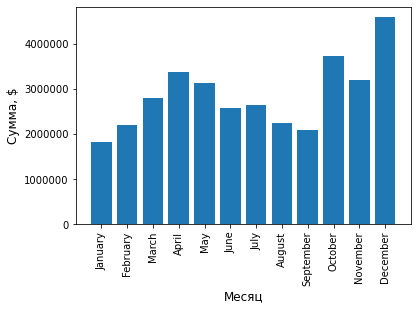

In [82]:
plt.bar(lst_m[1:], st_mnth)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation = 90)
plt.xlabel('Месяц', fontsize = 12)
plt.ylabel('Сумма, $', fontsize = 12)
plt.show()

In [83]:
# отредактировал адреса, оставив только значения городов и соответствующего штата
dt['Purchase Address'] = dt['Purchase Address'].apply(lambda x: x.split(', ')[1] + ' (' + x.split(', ')[2][0:2] + ')')
dt

,Order ID,Product,Quant,Price,Order Date,Purchase Address,Date,Month,Total
0,141234,iPhone,1,700.00,"[01/22/19, 21:25]",Boston (MA),2019-01-22,1,700.00
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]",Portland (OR),2019-01-28,1,14.95
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]",San Francisco (CA),2019-01-17,1,23.98
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]",Los Angeles (CA),2019-01-05,1,149.99
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]",Austin (TX),2019-01-25,1,11.99
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]",San Francisco (CA),2019-12-11,12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]",Los Angeles (CA),2019-12-01,12,7.68
186847,319668,Vareebadd Phone,1,400.00,"[12/09/19, 06:43]",Seattle (WA),2019-12-09,12,400.00
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]",Dallas (TX),2019-12-03,12,11.99


In [84]:
# сгруппировал данные для отчета по выручке за год в каждом из городов
st_city = dt.groupby('Purchase Address').Total.sum()
st_city

Purchase Address
Atlanta (GA)          2775561.51
Austin (TX)           1808093.71
Boston (MA)           3643758.86
Dallas (TX)           2758046.44
Los Angeles (CA)      5417015.18
New York City (NY)    4647095.28
Portland (ME)          448091.09
Portland (OR)         1863565.11
San Francisco (CA)    8220845.73
Seattle (WA)          2736082.73
Name: Total, dtype: float64

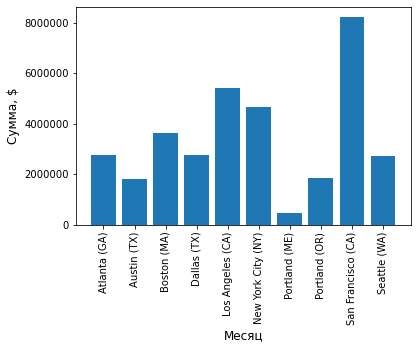

In [85]:
plt.bar(st_city.index, st_city)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation = 90)
plt.yticks(list(range(0, 8000001, 2000000)))
plt.xlabel('Месяц', fontsize = 12)
plt.ylabel('Сумма, $', fontsize = 12)
plt.show()

In [86]:
# выделил часы заказов в отдельный столбец
dt['Hour'] = pd.to_datetime(dt['Order Date'].str[1], format = '%H:%M').dt.hour
dt

,Order ID,Product,Quant,Price,Order Date,Purchase Address,Date,Month,Total,Hour
0,141234,iPhone,1,700.00,"[01/22/19, 21:25]",Boston (MA),2019-01-22,1,700.00,21
1,141235,Lightning Charging Cable,1,14.95,"[01/28/19, 14:15]",Portland (OR),2019-01-28,1,14.95,14
2,141236,Wired Headphones,2,11.99,"[01/17/19, 13:33]",San Francisco (CA),2019-01-17,1,23.98,13
3,141237,27in FHD Monitor,1,149.99,"[01/05/19, 20:33]",Los Angeles (CA),2019-01-05,1,149.99,20
4,141238,Wired Headphones,1,11.99,"[01/25/19, 11:59]",Austin (TX),2019-01-25,1,11.99,11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,"[12/11/19, 20:58]",San Francisco (CA),2019-12-11,12,14.95,20
186846,319667,AA Batteries (4-pack),2,3.84,"[12/01/19, 12:01]",Los Angeles (CA),2019-12-01,12,7.68,12
186847,319668,Vareebadd Phone,1,400.00,"[12/09/19, 06:43]",Seattle (WA),2019-12-09,12,400.00,6
186848,319669,Wired Headphones,1,11.99,"[12/03/19, 10:39]",Dallas (TX),2019-12-03,12,11.99,10


In [87]:
st_hour = dt.groupby('Hour').Total.sum()
st_hour

Hour
0      711279.35
1      457238.53
2      232671.14
3      145045.94
4      161431.05
5      226714.90
6      445551.70
7      741360.77
8     1189435.68
9     1632390.79
10    1933404.55
11    2286598.48
12    2303354.12
13    2141321.73
14    2074562.50
15    1932030.88
16    1895308.46
17    2123752.69
18    2210529.84
19    2397447.14
20    2269423.09
21    2032258.05
22    1599460.89
23    1175583.37
Name: Total, dtype: float64

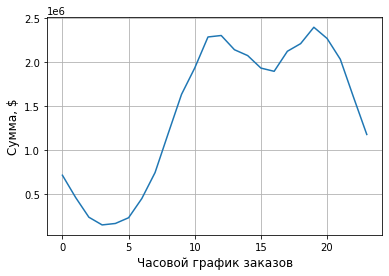

In [88]:
plt.plot(st_hour.index, st_hour)
plt.xlabel('Часовой график заказов', fontsize = 12)
plt.ylabel('Сумма, $', fontsize = 12)
plt.grid()
plt.show()

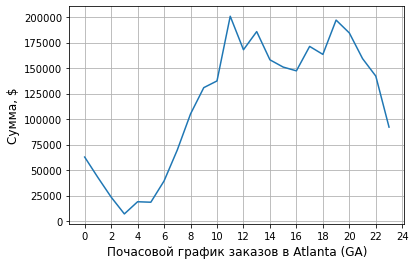

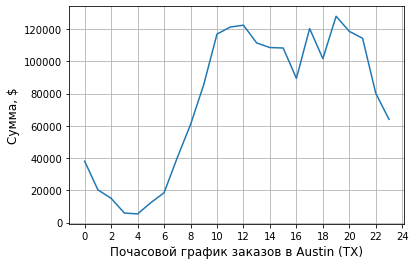

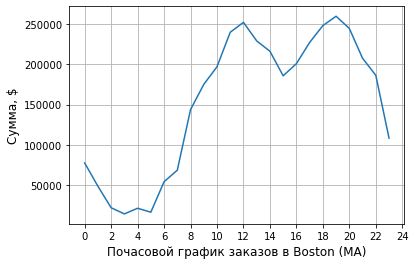

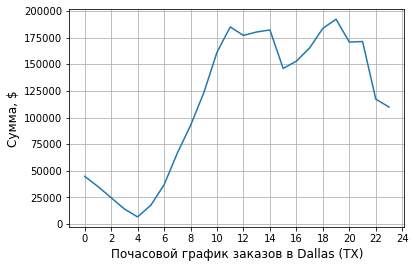

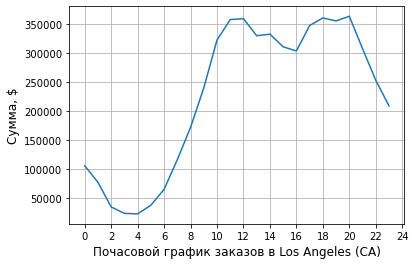

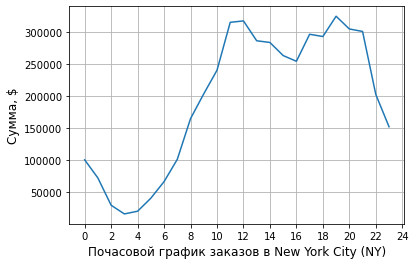

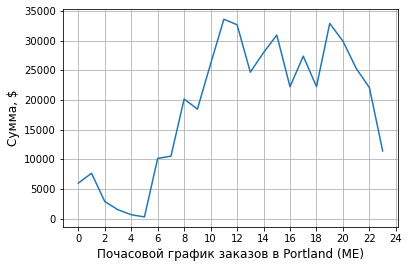

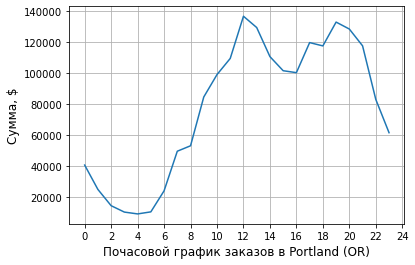

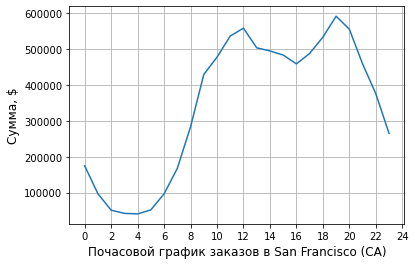

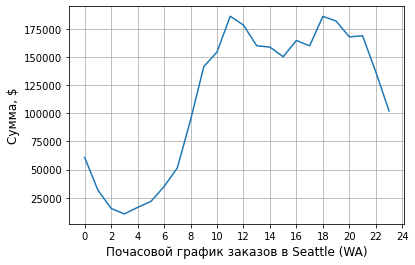

In [89]:
for city in st_city.index:
    st_hour = dt.loc[dt['Purchase Address'] == city].groupby('Hour').Total.sum()
    plt.plot(st_hour.index, st_hour)
    plt.xlabel('Почасовой график заказов в ' + city, fontsize = 12)
    plt.xticks(range(0, 25, 2))
    plt.ylabel('Сумма, $', fontsize = 12)
    plt.grid()
    plt.show()
    print()

In [90]:
dtn = dt[['Order ID', 'Product', 'Total']].reset_index(drop = True)
dtn

,Order ID,Product,Total
0,141234,iPhone,700.00
1,141235,Lightning Charging Cable,14.95
2,141236,Wired Headphones,23.98
3,141237,27in FHD Monitor,149.99
4,141238,Wired Headphones,11.99
...,...,...,...
185047,319666,Lightning Charging Cable,14.95
185048,319667,AA Batteries (4-pack),7.68
185049,319668,Vareebadd Phone,400.00
185050,319669,Wired Headphones,11.99


In [91]:
# преобразовал столбец Product так, чтобы в нем, в соответстивии с номером заказа, содержались все заказанные продукты для данного номера заказа
dtn_filt = dtn.groupby('Order ID').agg({'Order ID': 'count', 'Product': ', '.join, 'Total': 'sum'})
# выбрал строки с 2 или более товарами
dtn_filt = dtn_filt.loc[dtn_filt['Order ID'] > 1]
dtn_filt

,Order ID,Product,Total
Order ID,,,
141275,2,"USB-C Charging Cable, Wired Headphones",23.94
141290,2,"Apple Airpods Headphones, AA Batteries (4-pack)",161.52
141365,2,"Vareebadd Phone, Wired Headphones",411.99
141384,2,"Google Phone, USB-C Charging Cable",611.95
141450,2,"Google Phone, Bose SoundSport Headphones",699.99
...,...,...,...
319536,2,"Macbook Pro Laptop, Wired Headphones",1711.99
319556,2,"Google Phone, Wired Headphones",611.99
319584,2,"iPhone, Wired Headphones",711.99


In [92]:
# сформировал таблицу с подсчетом количества повторяющихся комплектов покупок и соответствующей общей суммой
# отобрал варианты комбинаций товаров, повторяющиеся более 100 раз
pl = dtn_filt.groupby('Product').agg({'Order ID': 'count', 'Total': 'sum'})
pl = pl.loc[pl['Order ID'] > 100].reset_index()
pl.rename(columns = {'Order ID': 'Count'}, inplace = True)
pl

,Product,Count,Total
0,"Google Phone, Bose SoundSport Headphones",160,112598.40
1,"Google Phone, USB-C Charging Cable",850,521017.90
2,"Google Phone, Wired Headphones",300,183968.69
3,"Vareebadd Phone, USB-C Charging Cable",308,127155.45
4,"Vareebadd Phone, Wired Headphones",103,42542.88
5,"iPhone, Apple Airpods Headphones",280,238150.00
6,"iPhone, Lightning Charging Cable",877,627878.25
7,"iPhone, Wired Headphones",359,255964.11


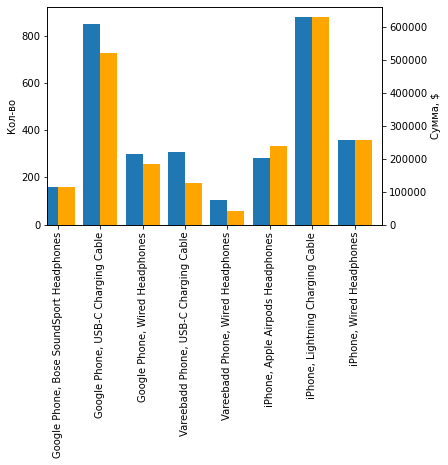

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

pl['Count'].plot(kind='bar', ax=ax, width=width, position=1)
pl['Total'].plot(kind='bar', color='orange', ax=ax2, width=width, position=0)
plt.xticks(pl.index, pl.Product)

ax.set_ylabel('Кол-во')
ax2.set_ylabel('Сумма, $')

plt.show()
